In [239]:
import pandas as pd
import numpy as np
import datetime
from scipy.spatial import distance
import matplotlib.pyplot as plt
import plotly.express as px

In [322]:
dataset = pd.read_csv("data.csv") #reading the data into dataframe

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (7,8,9,10,11,12,39) have mixed types.Specify dtype option on import or set low_memory=False.



In [323]:
dataset.head()

,Unnamed: 0,Date_Time,id,age,gender,infection_status,days_since_infection,date_of_infection,date_of_symptoms,date_of_recovery,...,infected_from_user_id,transmitted_count,asymptomatic_transmission,locationID_of_infection,income,household_size,bmi,date_of_test,test_result,Scenario
0,0,2020-01-01 00:00:00,32645,29,1,susceptible,0.0,NaN,NaN,NaN,...,-1,0,-1,-1,5774.248719,6,25,NaN,-1,0000001_20200922055707
1,1,2020-01-01 00:00:00,20022,30,1,susceptible,0.0,NaN,NaN,NaN,...,-1,0,-1,-1,14384.879182,1,24,NaN,-1,0000001_20200922055707
2,2,2020-01-01 00:00:00,18409,32,0,susceptible,0.0,NaN,NaN,NaN,...,-1,0,-1,-1,9502.567895,4,24,NaN,-1,0000001_20200922055707
3,3,2020-01-01 00:00:00,34113,29,1,susceptible,0.0,NaN,NaN,NaN,...,-1,0,-1,-1,7029.974753,5,20,NaN,-1,0000001_20200922055707
4,4,2020-01-01 00:00:00,40168,58,1,susceptible,0.0,NaN,NaN,NaN,...,-1,0,-1,-1,12378.711455,2,31,NaN,-1,0000001_20200922055707


In [324]:
dataset["Date"] = pd.to_datetime(dataset["Date_Time"]).dt.date #Extracting date in a new column
dataset["Time"] = pd.to_datetime(dataset["Date_Time"]).dt.time #Extracting time in a new column

In [325]:
dataset["Date_Time"] = pd.to_datetime(dataset["Date_Time"])

In [337]:
dataset["Dead"] = pd.to_datetime(dataset["date_of_death"]).dt.date

# Task 1.1

In [166]:
check_date = datetime.datetime(2020,3,1)
check_date = pd.to_datetime(check_date)
infected_df = dataset[(dataset.Date == check_date) & (dataset.infection_status.str.contains('infected'))]
infected_df.id.nunique()

1031

## 1031 individuals were infected before 2020-03-01

# Task 1.2

In [345]:
dead_df = dataset[(dataset.Date == check_date) & (dataset.infection_status == 'deceased')]
dead_df.id.nunique()

49

## 49 people died on 2020-03-01

# Task 1.3

In [10]:
dead = dataset[(dataset.infection_status == 'deceased')]
dead.id.nunique()

215

In [11]:
infected = dataset[(dataset.infection_status == 'infected')]
infected.id.nunique()

3854

In [225]:
recovered = dataset[(dataset.infection_status == 'recovered')]
recovered.id.nunique()

3658

## Total deaths are 215, infections are 3854 and recoveries are 3658

# Task 1.4

In [13]:
dataset.id.nunique()

10000

## 10000 unique individuals in the dataset

# Task 1.5

In [14]:
print("Names of Location Types ",dataset.currentLocationType.unique())
print("Total unique location IDs ",dataset.currentLocationID.nunique())

Names of Location Types  ['residential' 'shopping_mall' 'market' 'school' 'employment' 'hospital']
Total unique location IDs  4575


## There are 4575 unique locations under 6 different location types. The names of these locations are residential, shopping mall, market, school, employment, hospital

# Task 1.6

In [307]:
#function to return the school location with minimum distance
def findMinLoc(school_locs):
    min_loc = ()
    minDist = 100
    for loc in school_locs:
        temp = distance.euclidean(residence_loc,loc)
        if(temp < minDist):
            minDist = temp
            min_loc = loc
    return min_loc

In [313]:
school_lon = dataset[(dataset["currentLocationType"] == "school")].lon.unique()
school_lat = dataset[(dataset["currentLocationType"] == "school")].lat.unique()
school_locs = list(zip(school_lat,school_lon))
min_loc = findMinLoc(school_locs)

In [315]:
print("School ID with min Distance is ",
      dataset[(dataset["lon"] == min_loc[1]) & (dataset["lat"] == min_loc[0])].school_id.unique())
print("The location of the school is ",min_loc)

School ID with min Distance is  [3563]
The location of the school is  (-6.204529, 106.797409)


## The closest school to residence id 3115 is school id 3563 and 
## its location is (-6.204529, 106.797409)

# Task 1.7

In [370]:
check_time = datetime.time(8,0,0)
total_relevant_people = dataset[(dataset.age >= 30) & (dataset.age <= 60)]
visited_school = total_relevant_people[(total_relevant_people.currentLocationType == "school") & 
                                       (total_relevant_people.Time == check_time)]
# total_relevant_people = total_relevant_people.drop_duplicates(subset=['id'])
print((visited_school.id.nunique()/total_relevant_people.id.nunique())*100, "% people visited school at 8:00 AM")

97.05763804917372 % people visited school at 8:00 AM


## Percentage of people who visited school at 8:00 AM aged between 30 and 60 is 97.057%

# Task 1.8

In [20]:
temp = dataset[dataset.id == 37415]
temp.to_csv('out.csv', index=False)
#exporting the dataframe to csv and performing analysis using MS Excel

## The most frequent path used was :
## Residential-->Employment-->Employment-->Residential-->Residential

# Task 1.9

In [427]:
#getting data for the given ID to extract location on given date and time
id_data = dataset[(dataset["id"] == 37415)] 
#setting a random date and time in (YYYY,MM,DD,HH,MM,SS) format
c_date = pd.to_datetime(datetime.datetime(2020,3,1,8,0,0))
loc = id_data[(id_data.Date_Time == c_date)].currentLocationID.iloc[0] #getting the location of 37415
print("Location of id 37415 at given Date and Time is",loc)
dataset[(dataset.Date_Time == c_date) & 
        (dataset.currentLocationID == loc) & 
        (dataset.id != 37415)].id.nunique()

Location of id 37415 at given Date and Time is 3564


56

## In the above scenario, there are 56 individuals in the proximity of id 37415

# Task 1.10

In [22]:
age = dataset[(dataset["id"] == 37415)].age.unique()
gender = dataset[(dataset["id"] == 37415)].gender.unique()
infected = dataset[(dataset["infection_status"] == "infected") & (dataset["id"] == 37415)]
infected.to_csv("out.csv",index = False) #exporting csv for easy calculation of infection duration
print("Age ",age)
print("Gender ",gender)

Age  [30]
Gender  [1]


## The age of the individual is 30, he is male. He was infected for 29 days. He did not die and recovered on 12/04/2020

# Task 1.11

In [23]:
health_workers = dataset[(dataset["type_of_job"] == "Health worker")]
workers_infected = health_workers[(health_workers["infection_status"] == "infected")]
workers_dead = health_workers[(health_workers["infection_status"] == "deceased")]
print("Total healthcare workers ",health_workers.id.nunique())
print("Infected healthcare workers ",workers_infected.id.nunique())
print("Deceased healthcare workers ",workers_dead.id.nunique())

Total healthcare workers  403
Infected healthcare workers  387
Deceased healthcare workers  25


## Infection rate of healthcare workers is 96.02% and mortality rate is 6.2%

# Task 1.12

In [70]:
people = np.array(dataset[(dataset["infection_status"] == "deceased")].loc[:,("age","gender")])
group = np.array(dataset[(dataset["infection_status"] == "deceased")].loc[:,("age","gender")].drop_duplicates(subset=["age","gender"]))
survived = np.array(dataset[(dataset["infection_status"] != "deceased")].loc[:,("age","gender")])

In [71]:
rates = []
for person in group:
    deceased_ratio = np.count_nonzero((people == person)) 
    survived_ratio = np.count_nonzero((survived == person))
    total = deceased_ratio + survived_ratio
    rates.append((deceased_ratio/total)*100)

In [80]:
rates.sort()
for i,person in enumerate(group):
    print("Mortality Rate for age and gender ", person, " is ", rates[i] )

Mortality Rate for age and gender  [58  1]  is  0.6860491530190598
Mortality Rate for age and gender  [31  0]  is  0.6910325544238067
Mortality Rate for age and gender  [44  1]  is  0.6913254692050783
Mortality Rate for age and gender  [39  1]  is  0.6913823071997073
Mortality Rate for age and gender  [59  1]  is  0.6924423454222912
Mortality Rate for age and gender  [38  0]  is  0.6927739146776922
Mortality Rate for age and gender  [32  0]  is  0.6932940941505422
Mortality Rate for age and gender  [84  0]  is  0.6939069117140483
Mortality Rate for age and gender  [42  1]  is  0.6960549348559076
Mortality Rate for age and gender  [76  0]  is  0.6963298139768729
Mortality Rate for age and gender  [57  1]  is  0.6998214621311784
Mortality Rate for age and gender  [44  0]  is  0.7041432937897436
Mortality Rate for age and gender  [33  0]  is  0.7074273289082169
Mortality Rate for age and gender  [62  1]  is  0.7097399162948995
Mortality Rate for age and gender  [33  1]  is  0.712360223642

## As is evident by the above output, the mortality rate does change with age and gender

# Task 2.1

In [26]:
#function to get sum of cases w.r.t dates
def getCases(dates, case_dates):
    cases = []
    temp = 0
    for i in range(len(dates)):
        temp = 0
        for j in range(len(case_dates)):
            if(case_dates.iloc[j] == dates.iloc[i]):
                temp += 1
        cases.append(temp)
    return cases

In [27]:
#getting infections list from the data
infected_data = dataset[(dataset.infection_status == 'infected')]
infected_dates = infected_data.drop_duplicates(subset=['id']).Date
dates_inf = infected_data.drop_duplicates(subset=['Date']).Date
infections_list = getCases(dates_inf,infected_dates)

In [28]:
#getting recoveries list from the data
recovered_data = dataset[(dataset.infection_status == 'recovered')]
recovered_dates = recovered_data.drop_duplicates(subset=['id']).Date
dates_rec = recovered_data.drop_duplicates(subset=['Date']).Date
recoveries_list = getCases(dates_rec,recovered_dates)

In [29]:
#getting deaths list from the data
dead_data = dataset[(dataset.infection_status == 'deceased')]
dead_dates = dead_data.drop_duplicates(subset=['id']).Date
dates_dead = dead_data.drop_duplicates(subset=['Date']).Date
dead_list = getCases(dates_dead,dead_dates)

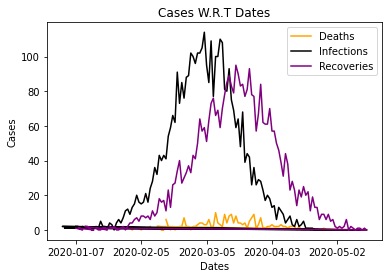

In [502]:
#Cases plot w.r.t dates
plt.plot(dates_dead, dead_list, color='orange', label = 'Deaths')
plt.plot(dates_inf, infections_list, color='black', label = 'Infections')
plt.plot(dates_rec, recoveries_list, color='purple', label = 'Recoveries')
plt.title("Cases W.R.T Dates")
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.xticks(dates_inf[::29])
plt.show()

# Task 2.2

In [34]:
asymptomatic = dataset[(dataset["is_symptomatic"] == 0) & (dataset["infection_status"] == "infected")]
symptomatic = dataset[(dataset["is_symptomatic"] == 1) & (dataset["infection_status"] == "infected")]

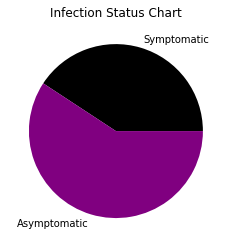

In [505]:
chart = np.array([symptomatic.id.nunique(), asymptomatic.id.nunique()])
mlabels = ["Symptomatic","Asymptomatic"]
plt.pie(chart,labels = mlabels, colors = ["black","purple"])
plt.title("Infection Status Chart")
plt.show()

# Task 2.3

In [482]:
id_ = dataset[(dataset.id == 37415)]
non_id = dataset[(dataset.id != 37415)]

In [488]:
times = id_.loc[:,"Time"].drop_duplicates()
dates = id_.loc[:,"Date"].drop_duplicates()

In [489]:
proximity = []
for date in dates:
    for time in times:
        indloc = np.array(id_[(id_.Date == date) & (id_.Time == time)].loc[:,"currentLocationID"])
        people = np.array(non_id[(non_id.Date == date) & (non_id.Time == time)].loc[:,"currentLocationID"])
        proximity.append(np.count_nonzero((people == indloc)))

In [499]:
#selecting only the maximum proximity of every day
index = np.array(range(0 , len(proximity), 5))
vals = []
for i in index:
    vals.append(max(proximity[i:i+4]))
dat = np.unique(dates)

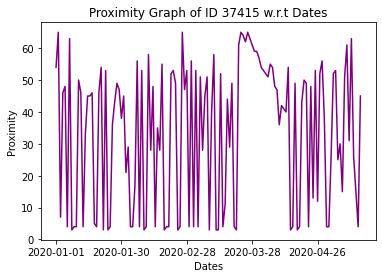

In [507]:
plt.plot(dat, vals, color = 'purple')
plt.title("Proximity Graph of ID 37415 w.r.t Dates")
plt.xlabel("Dates")
plt.ylabel("Proximity")
plt.xticks(dat[::29]) 
plt.show()

# Task 2.4

In [82]:
group1 = dataset[(dataset["age"] >= 0) & (dataset["age"] <= 10)]
group2 = dataset[(dataset["age"] > 10) & (dataset["age"] <= 20)]
group3 = dataset[(dataset["age"] > 20) & (dataset["age"] <= 30)]
group4 = dataset[(dataset["age"] > 30) & (dataset["age"] <= 40)]
group5 = dataset[(dataset["age"] > 40) & (dataset["age"] <= 50)]
group6 = dataset[(dataset["age"] > 50) & (dataset["age"] <= 60)]
group7 = dataset[(dataset["age"] > 60) & (dataset["age"] <= 70)]
group8 = dataset[(dataset["age"] > 70) & (dataset["age"] <= 80)]
group9 = dataset[(dataset["age"] > 80) & (dataset["age"] <= 90)]

In [90]:
age_groups = [group1,group2,group3,group4,group5,group6,group7,group8,group9]

In [108]:
mor_rates = []
inf_rates = []
for age in age_groups:
    mor_rates.append(age[(age["infection_status"] == "deceased")].id.nunique())
    inf_rates.append(age[(age["infection_status"] == "infected")].id.nunique())
print(mor_rates)
print(inf_rates)

[0, 0, 0, 55, 53, 74, 21, 6, 6]
[289, 619, 1173, 910, 485, 311, 42, 13, 12]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



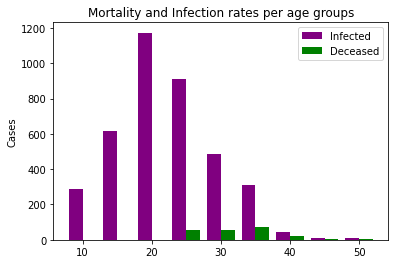

In [509]:
width = 0.4
fig, ax = plt.subplots()
rects1 = ax.bar((x- width/2), inf_rates, width, label='Infected', color = "purple")
rects2 = ax.bar((x+ width/2), mor_rates, width, label='Deceased', color = "green")

x = np.arange(len(ages))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Mortality and Infection rates per age groups')
ax.set_xticklabels(x * 10)
ax.legend()

plt.show()

# Task 2.5

## Visualize the number of individuals at a location on a geographical map.